# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by: 
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have: 
$$ Prob(x<M_n<y) = \sum_{r \in \mathcal Z~\wedge~x<\frac{r}{n}<y} P(r;n) $$



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

In [1]:
%pylab inline
import scipy
from scipy import special
import scipy.optimize
import numpy
import random

Populating the interactive namespace from numpy and matplotlib


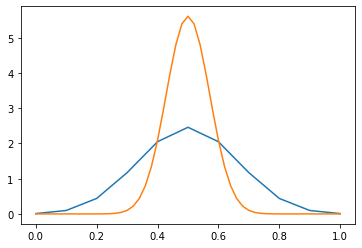

In [2]:
#Take fixed n = 100
def prob_plotter(n):
    heads_wanted = np.linspace(0,n,n+1)
    comb = scipy.special.comb(n,heads_wanted)
    for i in range(n+1):
        comb[i] = comb[i]*(numpy.power(0.5,i))*(numpy.power(0.5,(n-i)))
        
    heads_wanted = heads_wanted/n
    plt.plot(heads_wanted,n*comb)
    return heads_wanted,comb



#Take linspace (points from heads_wanted , comb)
heads_wanted,comb = prob_plotter(10)
heads_wanted,comb = prob_plotter(50)


[2.12669006e-02 2.70559005e+02 5.41187244e+02]


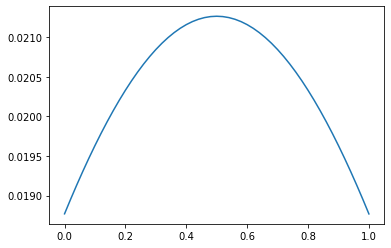

In [3]:
# Gaussian curve fitting
def gaussian_fun(x,h,x0,sigma):
   return h*(e**((-0.5)*((x-x0/sigma)**2)))
    
    
popt, pcov = scipy.optimize.curve_fit(gaussian_fun,heads_wanted,comb,[1,1,1])
print(popt)
plt.plot(heads_wanted,gaussian_fun(heads_wanted,popt[0],popt[1],popt[2]))



## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$

Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

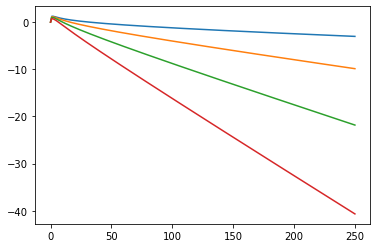

In [4]:
#To plot: log P(Mn>x)
#For values of n from 1 to 250
#for x = 0.6 , 0.7, 0.8 , 0.9
#Instructions : We vary n and for each n we have a gaussian plot for a x ranging from 0 to n
#After obtaining the curve, we find the area for P(x) vs x for x > 0.6
#We do so for varying values of N and store it in an array
#And then we plot(P(Mn > x))

d = list(range(0,251))

for i in np.arange(0.6,1,0.1):
    y = []
    for j in range(0,251):
        sum = 0.0  
        xv = np.linspace((i*j) , j+1 , 100)
        sum = (scipy.special.comb(j,xv)*(0.5**xv)*(0.5**(j-xv)))
        sum_all = np.sum(sum)
        if sum_all == 0:
            y.append(10**-10)
        if sum_all!=0:
            y.append(np.log10(sum_all))
    plot(d,y)
    
            

        
        
    

## Task-3: 
Note that for large $N$, the above plots are linear. 
Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

In [65]:
def prob_greater_x(n,x):
    p = []
    y = []
    r= arange(x*n+1,n,dtype=int)
    for i in r:
        p.append(n)
        y.append(i)
    p = array(p)
    c =scipy.special.comb(p,y)
    add = numpy.sum(c)
    return add/pow(2,n)

def probability(n,x):
    list1 = arange(1,n+1,1)
    list2 = []
    for i in range(1,n+1):
        if prob_greater_x(i,x)!=0:
            list2.append(prob_greater_x(i,x))
        else:
            list2.append(1)
    list2 = array(list2)
    return list1,log(list2)


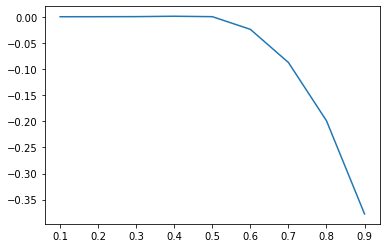

In [66]:

def line(x,m,c):
    return m*x+c

def fit_line(n,x):
    l1,l2 = probability(n,x)
    yopt, ycov = scipy.optimize.curve_fit(line, l1, l2, [-1,0])
    return yopt[0]


x = arange(0.1,1,0.1)
y = []
for i in range(9):
    y.append(fit_line(250,x[i]))
    
y = array(y)
plot(x,y)


## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by 
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$ 
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

Plot a one realisation of $x(t)$ for $t\in[0,100]$


Text(0.5, 1.0, 'Random walk in 1 dimension')

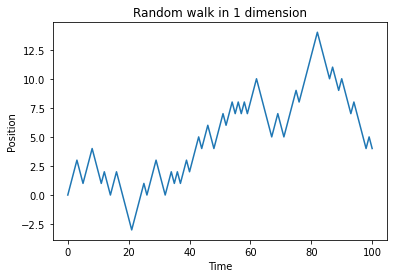

In [8]:
#Random walk code
x = [0]
#If toss is heads, we use +1 or we use -1
x = [0]
for t in range(0,100):
    x.append(x[-1] + np.random.randint(0,2)*2-1)
          
        
plt.plot(list(range(0,101)),x)
plt.ylabel('Position')
plt.xlabel('Time')
plt.title('Random walk in 1 dimension')
   
    
    

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$? 
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

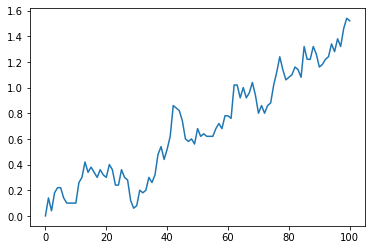

In [18]:
xi = np.zeros(101)
for i in range(100):
    x=[0]
    for t in range(100):
         x.append(x[-1] + np.random.randint(0,2)*2-1)
    xi+=x
    
for i in range(101):
    xi[i] = xi[i]/100
plt.plot(np.arange(0,101) , xi)
            
        

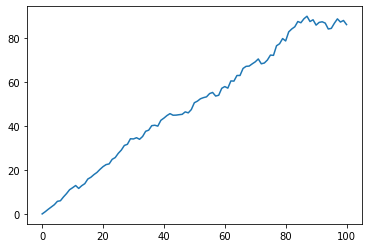

In [21]:
xi = np.zeros(101)
for i in range(100):
    x = [0]
    for t in range(100):
        x.append(x[-1] + np.random.randint(0,2)*2-1)
    x = np.multiply(x,x)
    xi+=x
    
plt.plot(np.arange(0,101) , xi/100)

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail, where once the 'drunk' random walker reaches, is trapped for ever. 

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$. 

Compute $y_M(t)$ by generating a sample of random walks. Comment.

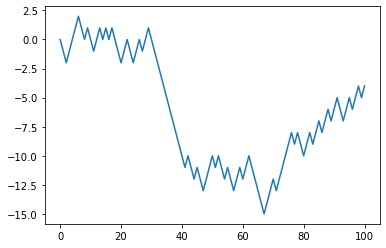

In [33]:
def random_walk(n,trap):
    x = [0]
    for i in range(n):
        if x[-1] == trap:
            x.append(trap)
        else:
            x.append(x[-1]+np.random.randint(0,2)*2-1)
    return x

x = random_walk(100,10)
plt.plot(list(range(101)) , x)

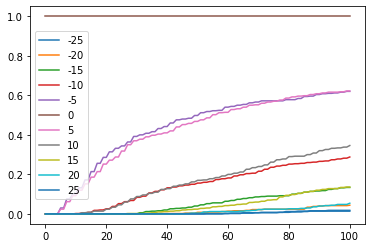

In [38]:
def trapped(n,m,k):
# Here n is the number of random walks considered
    xvals = []
    global t
    for i in range(n):
        x = random_walk(k,k+10)
        xvals.append(x)
    y = []
    xvals = array(xvals)
    for i in range(k+1):
        count = 0
        for j in range(n):
            if xvals[j][i] == m:
                count +=1
                if i!=k:
                    xvals[j][i+1] = m
        y.append(count/n)
    return y

test = [-25,-20,-15,-10,-5,0,5,10,15,20,25]
result = []
for i in range(11):
    result.append(trapped(500,test[i],100))
    plot(list(range(101)),result[i],label = str(test[i]))
legend()

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem